# Project 3 - Reddit Classification: Powerlifting vs. Bodybuilding

# Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

In [2]:
powerlifting_bodybuilding = pd.read_csv('data/powerlifting_bodybuilding.csv')

In [3]:
powerlifting_bodybuilding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1990 non-null   object 
 1   created_utc  1990 non-null   float64
 2   title        1990 non-null   object 
 3   self_text    177 non-null    object 
 4   subreddit    1990 non-null   int64  
 5   all_text     1990 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.4+ KB


In [4]:
powerlifting_bodybuilding.isna().sum()

id                0
created_utc       0
title             0
self_text      1813
subreddit         0
all_text          0
dtype: int64

In [5]:
powerlifting_bodybuilding['self_text'].fillna('None', inplace=True)

In [6]:
powerlifting_bodybuilding.isna().sum()

id             0
created_utc    0
title          0
self_text      0
subreddit      0
all_text       0
dtype: int64

In [7]:
powerlifting_bodybuilding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1990 non-null   object 
 1   created_utc  1990 non-null   float64
 2   title        1990 non-null   object 
 3   self_text    1990 non-null   object 
 4   subreddit    1990 non-null   int64  
 5   all_text     1990 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 93.4+ KB


In [8]:
powerlifting_bodybuilding

,id,created_utc,title,self_text,subreddit,all_text
0,844947,1.520949e+09,My 64 yr old mom breaking RPS 60-64 age/198 lb...,None,1,My 64 yr old mom breaking RPS 60-64 age/198 lb...
1,9s6nh4,1.540760e+09,Lifter with Cerebral Palsy. This is what power...,None,1,Lifter with Cerebral Palsy. This is what power...
2,gc9nq6,1.588438e+09,Hafthor Bjornsson deadlifts 501kg,None,1,Hafthor Bjornsson deadlifts 501kg
3,12fz87c,1.680990e+09,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",None,1,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ..."
4,aoauyd,1.549587e+09,A true power lifter,None,1,A true power lifter
...,...,...,...,...,...,...
1985,j8x9lb,1.602383e+09,Super happy with a gold and silver at my first...,None,2,Super happy with a gold and silver at my first...
1986,ccpjdj,1.563026e+09,Light weight!,None,2,Light weight!
1987,73p5f2,1.506901e+09,"Seen a lot of freaks on the sub latley, so her...",None,2,"Seen a lot of freaks on the sub latley, so her..."
1988,ii0p1b,1.598590e+09,"Classic Physique Athlete Corey Becker, beginni...",None,2,"Classic Physique Athlete Corey Becker, beginni..."


In [9]:
# create column for length of characters in title
powerlifting_bodybuilding['title_length_characters'] = powerlifting_bodybuilding['title'].str.len()

# create column for length of words in title
powerlifting_bodybuilding['title_length_words'] = powerlifting_bodybuilding['title'].str.split().str.len()

powerlifting_bodybuilding

,id,created_utc,title,self_text,subreddit,all_text,title_length_characters,title_length_words
0,844947,1.520949e+09,My 64 yr old mom breaking RPS 60-64 age/198 lb...,None,1,My 64 yr old mom breaking RPS 60-64 age/198 lb...,92,18
1,9s6nh4,1.540760e+09,Lifter with Cerebral Palsy. This is what power...,None,1,Lifter with Cerebral Palsy. This is what power...,62,10
2,gc9nq6,1.588438e+09,Hafthor Bjornsson deadlifts 501kg,None,1,Hafthor Bjornsson deadlifts 501kg,33,4
3,12fz87c,1.680990e+09,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",None,1,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",55,12
4,aoauyd,1.549587e+09,A true power lifter,None,1,A true power lifter,19,4
...,...,...,...,...,...,...,...,...
1985,j8x9lb,1.602383e+09,Super happy with a gold and silver at my first...,None,2,Super happy with a gold and silver at my first...,74,13
1986,ccpjdj,1.563026e+09,Light weight!,None,2,Light weight!,13,2
1987,73p5f2,1.506901e+09,"Seen a lot of freaks on the sub latley, so her...",None,2,"Seen a lot of freaks on the sub latley, so her...",81,18
1988,ii0p1b,1.598590e+09,"Classic Physique Athlete Corey Becker, beginni...",None,2,"Classic Physique Athlete Corey Becker, beginni...",94,15


In [10]:
# filter df for only powerlifting rows
powerlifting = powerlifting_bodybuilding[powerlifting_bodybuilding['subreddit'] == 1]

In [11]:
# display average number of characters for powerlifting data
powerlifting_mean_characters = powerlifting['title_length_characters'].mean()
powerlifting_mean_characters

56.578156312625254

In [12]:
# display average number of words for powerlifting data
powerlifting_mean_words = powerlifting['title_length_words'].mean()
powerlifting_mean_words

9.517034068136272

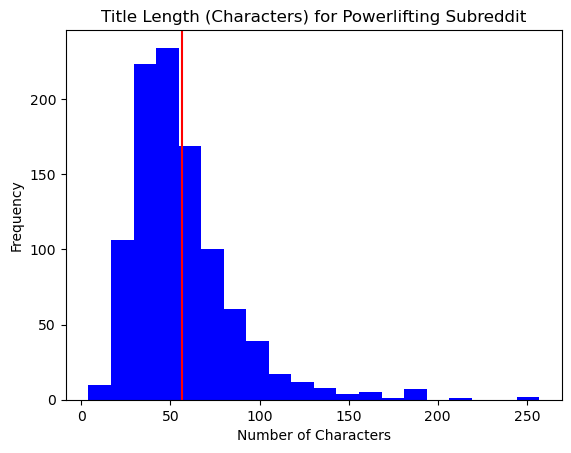

In [13]:
# plot histogram for powerlifting characters
plt.hist(powerlifting['title_length_characters'], bins=20, color='blue')
plt.axvline(powerlifting_mean_characters, color='red')
plt.title('Title Length (Characters) for Powerlifting Subreddit')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency');

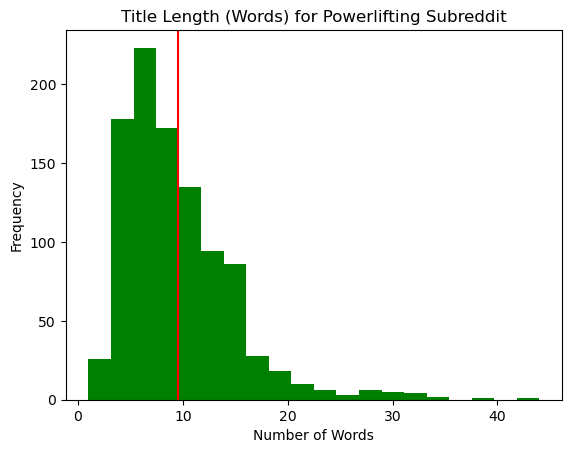

In [14]:
# plot histogram for powerlifting words
plt.hist(powerlifting['title_length_words'], bins=20, color='green')
plt.axvline(powerlifting_mean_words, color='red')
plt.title('Title Length (Words) for Powerlifting Subreddit')
plt.xlabel('Number of Words')
plt.ylabel('Frequency');

In [15]:
# filter df for only bodybuilding rows
bodybuilding = powerlifting_bodybuilding[powerlifting_bodybuilding['subreddit'] == 2]

In [16]:
# display average number of characters for bodybuilding data
bodybuilding_mean_characters = bodybuilding['title_length_characters'].mean()
bodybuilding_mean_characters

65.68245967741936

In [17]:
# display average number of words for bodybuilding data
bodybuilding_mean_words = bodybuilding['title_length_words'].mean()
bodybuilding_mean_words

11.946572580645162

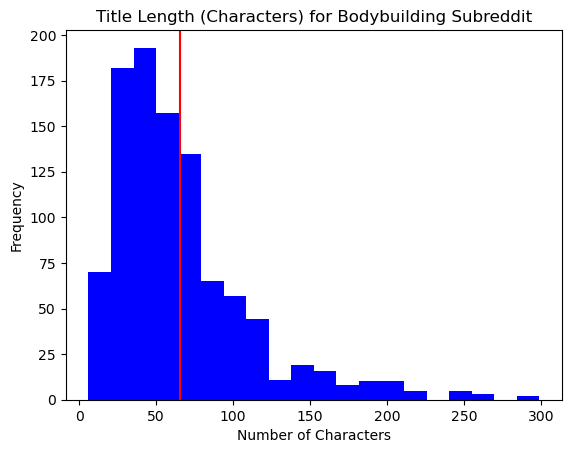

In [18]:
# plot histogram for bodybuilding characters
plt.hist(bodybuilding['title_length_characters'], bins=20, color='blue')
plt.axvline(bodybuilding_mean_characters, color='red')
plt.title('Title Length (Characters) for Bodybuilding Subreddit')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency');

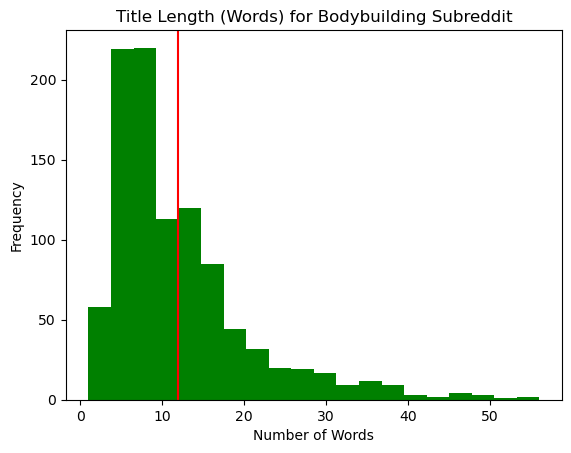

In [19]:
# plot histogram for bodybuilding words
plt.hist(bodybuilding['title_length_words'], bins=20, color='green')
plt.axvline(bodybuilding_mean_words, color='red')
plt.title('Title Length (Words) for Bodybuilding Subreddit')
plt.xlabel('Number of Words')
plt.ylabel('Frequency');

In [20]:
# create list of stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(['https', 'com', 'nbsp', 'www', 'just', 've', 'like', 'really', 'new', 'good', 'did']))

# initialize CountVectorizer
cvect = CountVectorizer(
    max_features=None,
    stop_words=stop_words
)

# fit and transform 'all_text' column
X = cvect.fit_transform(powerlifting_bodybuilding['all_text'])

# convert to df
all_text_columns = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())

# combine original df with new df
powerlifting_bodybuilding_all_text = pd.concat([powerlifting_bodybuilding, all_text_columns], axis=1)
powerlifting_bodybuilding_all_text.head()

,id,created_utc,title,self_text,subreddit,all_text,title_length_characters,title_length_words,000,000kcal,...,zamani,zane,zealand,zero,zeus,zglwwrpgqxq,zknuh5g8tlm,zone,zurich,zyzz
0,844947,1.520949e+09,My 64 yr old mom breaking RPS 60-64 age/198 lb...,None,1,My 64 yr old mom breaking RPS 60-64 age/198 lb...,92,18,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9s6nh4,1.540760e+09,Lifter with Cerebral Palsy. This is what power...,None,1,Lifter with Cerebral Palsy. This is what power...,62,10,0,0,...,0,0,0,0,0,0,0,0,0,0
2,gc9nq6,1.588438e+09,Hafthor Bjornsson deadlifts 501kg,None,1,Hafthor Bjornsson deadlifts 501kg,33,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12fz87c,1.680990e+09,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",None,1,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",55,12,0,0,...,0,0,0,0,0,0,0,0,0,0
4,aoauyd,1.549587e+09,A true power lifter,None,1,A true power lifter,19,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
all_text_columns.head()

,000,000kcal,000lb,005lbs,00am,00pm,019,02,023lbs,028,...,zamani,zane,zealand,zero,zeus,zglwwrpgqxq,zknuh5g8tlm,zone,zurich,zyzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# calculate word counts
word_counts = all_text_columns.sum().sort_values(ascending=False)
word_counts.head()

bench       305
lbs         303
deadlift    288
squat       266
kg          246
dtype: int64

In [23]:
# display top 25 words for combined data
top_25_words = word_counts.head(25)
top_25_words

bench           305
lbs             303
deadlift        288
squat           266
kg              246
weeks           229
training        219
time            217
powerlifting    215
meet            204
day             198
week            162
squats          149
total           146
years           144
weight          141
gym             123
days            119
youtube         119
5kg             113
raw             113
arnold          113
program         112
lift            111
year            110
dtype: int64

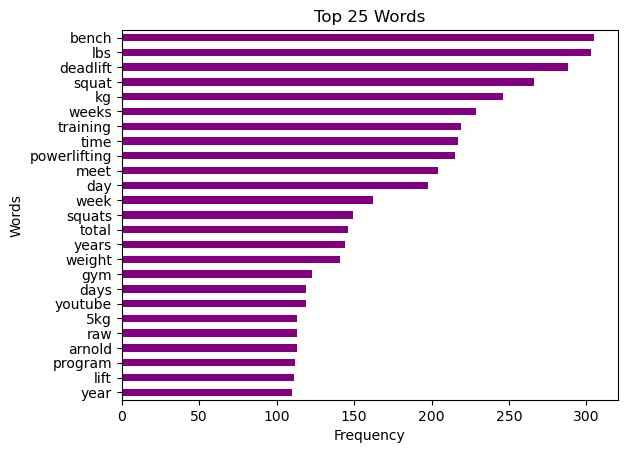

In [24]:
# display bar plot of top 25 words for combined data
top_25_words[::-1].plot(kind='barh', color='purple')
plt.title('Top 25 Words')
plt.xlabel('Frequency')
plt.ylabel('Words');

In [25]:
powerlifting.head()

,id,created_utc,title,self_text,subreddit,all_text,title_length_characters,title_length_words
0,844947,1.520949e+09,My 64 yr old mom breaking RPS 60-64 age/198 lb...,None,1,My 64 yr old mom breaking RPS 60-64 age/198 lb...,92,18
1,9s6nh4,1.540760e+09,Lifter with Cerebral Palsy. This is what power...,None,1,Lifter with Cerebral Palsy. This is what power...,62,10
2,gc9nq6,1.588438e+09,Hafthor Bjornsson deadlifts 501kg,None,1,Hafthor Bjornsson deadlifts 501kg,33,4
3,12fz87c,1.680990e+09,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",None,1,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ...",55,12
4,aoauyd,1.549587e+09,A true power lifter,None,1,A true power lifter,19,4


In [26]:
# fit and transform 'all_text' column for only powerlifting data
X = cvect.fit_transform(powerlifting['all_text'])

# convert to df
powerlifting_all_text_columns = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())
powerlifting_all_text_columns.head()

,000,000kcal,000lb,005lbs,00am,00pm,019,02,023lbs,028,...,z1jjp,zac,zack,zahir,zamani,zero,zglwwrpgqxq,zknuh5g8tlm,zone,zyzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# calculate word counts for powerlifting
powerlifting_word_counts = powerlifting_all_text_columns.sum().sort_values(ascending=False)
powerlifting_word_counts.head()

bench       299
deadlift    288
lbs         281
squat       265
kg          246
dtype: int64

In [28]:
# display top 25 words for powerlifting
powerlifting_top_25_words = powerlifting_word_counts.head(25)
powerlifting_top_25_words

bench           299
deadlift        288
lbs             281
squat           265
kg              246
powerlifting    215
training        205
meet            201
time            168
day             157
squats          147
total           143
week            139
weight          132
youtube         115
raw             113
5kg             111
lift            110
program         110
watch           107
reddit          101
don              98
work             98
reps             95
people           95
dtype: int64

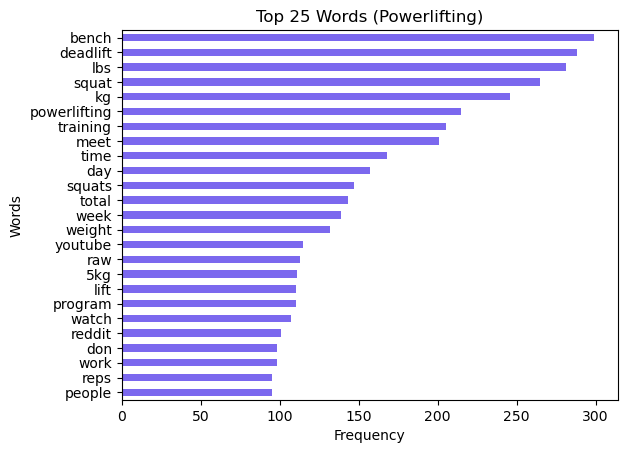

In [29]:
# display bar plot of top 25 words for powerlifting
powerlifting_top_25_words[::-1].plot(kind='barh', color='mediumslateblue')
plt.title('Top 25 Words (Powerlifting)')
plt.xlabel('Frequency')
plt.ylabel('Words');

In [30]:
bodybuilding.head()

,id,created_utc,title,self_text,subreddit,all_text,title_length_characters,title_length_words
998,cxjwqb,1.567185e+09,"To my best friend, Franco",None,2,"To my best friend, Franco",25,5
999,93fatt,1.533050e+09,Thank you all for pumping me up on my birthday,None,2,Thank you all for pumping me up on my birthday,46,10
1000,ik6fqj,1.598907e+09,It is back day,None,2,It is back day,14,4
1001,97umxn,1.534443e+09,I got my 1969 Mr. Universe class trophy back!,None,2,I got my 1969 Mr. Universe class trophy back!,45,9
1002,968445,1.533916e+09,One of my rules is... break the rules,None,2,One of my rules is... break the rules,37,8


In [31]:
# fit and transform 'all_text' column for only bodybuilding data
X = cvect.fit_transform(bodybuilding['all_text'])

# convert to df
bodybuilding_all_text_columns = pd.DataFrame(X.toarray(), columns=cvect.get_feature_names_out())
bodybuilding_all_text_columns.head()

,000,04,0770059834333178,10,100,101,104,107,108kg,10th,...,youngest,youtube,yr,yrs,yt,zane,zealand,zeus,zurich,zyzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# calculate word counts for bodybuilding
bodybuilding_word_counts = bodybuilding_all_text_columns.sum().sort_values(ascending=False)
bodybuilding_word_counts.head()

weeks       143
arnold      101
physique     76
classic      71
looking      62
dtype: int64

In [33]:
# display top 25 words for bodybuilding
bodybuilding_top_25_words = bodybuilding_word_counts.head(25)
bodybuilding_top_25_words

weeks           143
arnold          101
physique         76
classic          71
looking          62
olympia          57
pro              56
bodybuilding     54
years            52
year             52
days             50
time             49
mr               47
today            42
day              41
bodybuilder      39
big              36
old              35
update           33
competition      32
won              30
absolutely       30
got              30
gym              29
10               29
dtype: int64

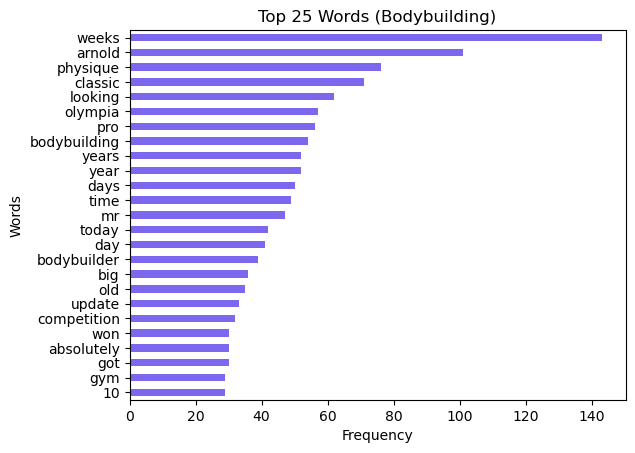

In [34]:
# display bar plot of top 25 words for bodybuilding
bodybuilding_top_25_words[::-1].plot(kind='barh', color='mediumslateblue')
plt.title('Top 25 Words (Bodybuilding)')
plt.xlabel('Frequency')
plt.ylabel('Words');

In [35]:
# create new df of just 'subreddit' and 'all_text' columns
subreddit_all_text = powerlifting_bodybuilding[['subreddit', 'all_text']]
subreddit_all_text

,subreddit,all_text
0,1,My 64 yr old mom breaking RPS 60-64 age/198 lb...
1,1,Lifter with Cerebral Palsy. This is what power...
2,1,Hafthor Bjornsson deadlifts 501kg
3,1,"Finally hit 400 lbs in a meet!! 402.3 lbs, 48 ..."
4,1,A true power lifter
...,...,...
1985,2,Super happy with a gold and silver at my first...
1986,2,Light weight!
1987,2,"Seen a lot of freaks on the sub latley, so her..."
1988,2,"Classic Physique Athlete Corey Becker, beginni..."


In [36]:
# save 'subreddit' and 'all_text' columns to new csv file
subreddit_all_text.to_csv('data/subreddit_all_text.csv', index=False)